In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [9]:
df = pd.read_csv("clusterdata.csv")
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         23 non-null     int64  
 1   Distance_Feature  23 non-null     float64
 2   Speeding_Feature  23 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 680.0 bytes


In [4]:
features = ["Distance_Feature", "Speeding_Feature"]

In [11]:
X = df[features]

In [12]:
z = StandardScaler()

In [13]:
X[features] = z.fit_transform(X)

In [14]:
EM = GaussianMixture(n_components = 4)
EM.fit(X)

GaussianMixture(n_components=4)

In [15]:
cluster = EM.predict(X)

In [16]:
print('SILHOUETTE: ', silhouette_score(X, cluster))

SILHOUETTE:  0.21678608385782352


In [20]:
X["cluster"] = cluster

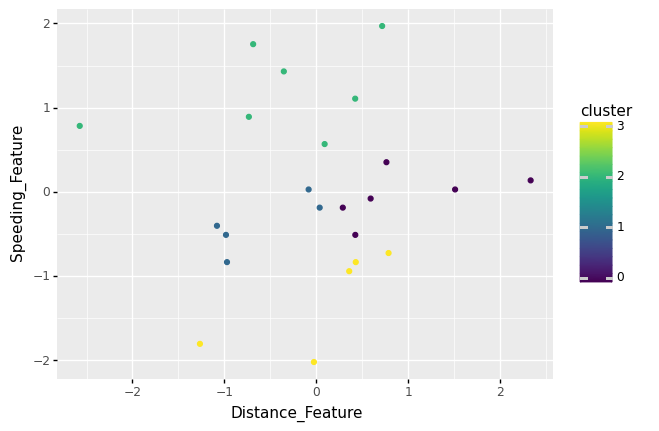

<ggplot: (95236942900)>

In [17]:
(ggplot(X, aes(x = "Distance_Feature", y = "Speeding_Feature", color = "cluster")) + geom_point())

In [21]:
df0 = df[X["cluster"]==0]
df1 = df[X["cluster"]==1]
df2 = df[X["cluster"]==2]
df3 = df[X["cluster"]==3]

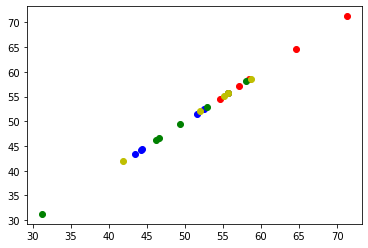

In [22]:
plt.scatter(df0["Distance_Feature"],df0["Distance_Feature"],color='r')
plt.scatter(df1["Distance_Feature"],df1["Distance_Feature"],color='b')
plt.scatter(df2["Distance_Feature"],df2["Distance_Feature"],color='g')
plt.scatter(df3["Distance_Feature"],df3["Distance_Feature"],color='y')